# Churn Project 

##  1- Problem statement

Customer churn is a SaaS business metric that measures the amount of customers, accounts, contracts, bookings, etc. that a business has lost over a period of time. Also known as the rate of attrition or just plain “churn”, customer churn is one of the most widely-tracked and heavily-discussed subscription company metrics.

The goal of this project is to build a model that can predict if a customer will leave the business (churn risk score =1) or will stay (churn risk score = 0).

## 2- Data description

**age** Represents the age of a customer 
<br>
**gender** Represents the gender of a customer
<br>
**security_no** Represents a unique security number that is used to identify a person
<br>
**region_category** Represents the region that a customer belongs to
<br>
**membership_category** Represents the category of the membership that a customer is using
<br>
**joining_date** Represents the date when a customer became a member
<br>
**joined_through_referral** Represents whether a customer joined using any referral code or ID
<br>
**referral_id** Represents a referral ID
<br>
**preferred_offer_types** Represents the type of offer that a customer prefers
<br>
**medium_of_operation** Represents the medium of operation that a customer uses for transactions
<br>
**internet_option** Represents the type of internet service a customer uses
<br>
**last_visit_time** Represents the last time a customer visited the website
<br>
**days_since_last_login** Represents the no. of days since a customer last logged into the website
<br>
**avg_time_spent** Represents the average time spent by a customer on the website
<br>
**avg_transaction_value** Represents the average transaction value of a customer
<br>
**avg_frequency_login_days** Represents the no. of times a customer has logged in to the website
<br>
**points_in_wallet** Represents the points awarded to a customer on each transaction
<br>
**used_special_discount** Represents whether a customer uses special discounts offered dd

Data source: https://www.hackerearth.com/fr/problem/machine-learning/predict-the-churn-risk-rate-11-fb7a760d/

## 3- Packages used

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib
%matplotlib inline
plt.style.use('ggplot')
import numpy as np
import seaborn as sns
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import train_test_split, HalvingGridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import OrdinalEncoder
from sklearn.experimental import enable_halving_search_cv
from xgboost import XGBClassifier

## 4- Importing Data

In [2]:
churn = pd.read_csv('churn.csv')
churn.head()

,Unnamed: 0,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,0,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,0
1,1,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,Gift Vouchers/Coupons,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,0
2,2,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,1
3,3,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,1
4,4,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,1


In [3]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    36992 non-null  int64  
 1   age                           36992 non-null  int64  
 2   gender                        36992 non-null  object 
 3   security_no                   36992 non-null  object 
 4   region_category               31564 non-null  object 
 5   membership_category           36992 non-null  object 
 6   joining_date                  36992 non-null  object 
 7   joined_through_referral       36992 non-null  object 
 8   referral_id                   36992 non-null  object 
 9   preferred_offer_types         36704 non-null  object 
 10  medium_of_operation           36992 non-null  object 
 11  internet_option               36992 non-null  object 
 12  last_visit_time               36992 non-null  object 
 13  d

## 5- Data preparation

#### Looking at the features we notice that some of them aren't needed such as 'Unamed',security_no','referral_id' and 'last_visit_time' so we'll try to remove them from our data

In [4]:
churn = churn.drop(['Unnamed: 0','security_no','referral_id','last_visit_time'],axis = 1)

#### Also we notice thet avg_frequency_login_days is an object, so we'll check for some unindentified values and then transforme the feature into float 64

In [5]:
## the average freq day
churn['avg_frequency_login_days'].value_counts()

Error                 3522
13.0                  1394
19.0                  1365
8.0                   1361
14.0                  1355
                      ... 
25.4982132073294         1
-4.82524632898345        1
-8.941315163201281       1
49.855140630052205       1
31.289630359597375       1
Name: avg_frequency_login_days, Length: 1654, dtype: int64

#### the feature 'avg_frequency_login_days' has unindentified 'Error' so we'll replace it with a Nan and transform it

In [6]:
churn['avg_frequency_login_days'] = churn['avg_frequency_login_days'].replace('Error',np.nan).astype('float64')

#### the the joining date feature is also an object. To fix it, we'll transform it into integer with only the year of joining

In [7]:
## joining date feature 
churn['joining_date'] = churn['joining_date'].apply(lambda x: int(x.split('-')[0]))

#### To clean the Data more, we'll check for unindentified values in categorical features and replace them with Nan.

In [8]:
##  Removing irrealevant observations and replacing them with Nas
##for categorical variables
cat  = churn.select_dtypes('object').columns.tolist()
for col in cat:
   print(col ,'\n', churn[col].unique())

gender 
 ['F' 'M' 'Unknown']
region_category 
 ['Village' 'City' 'Town' nan]
membership_category 
 ['Platinum Membership' 'Premium Membership' 'No Membership'
 'Gold Membership' 'Silver Membership' 'Basic Membership']
joined_through_referral 
 ['No' '?' 'Yes']
preferred_offer_types 
 ['Gift Vouchers/Coupons' 'Credit/Debit Card Offers' 'Without Offers' nan]
medium_of_operation 
 ['?' 'Desktop' 'Smartphone' 'Both']
internet_option 
 ['Wi-Fi' 'Mobile_Data' 'Fiber_Optic']
used_special_discount 
 ['Yes' 'No']
offer_application_preference 
 ['Yes' 'No']
past_complaint 
 ['No' 'Yes']
complaint_status 
 ['Not Applicable' 'Solved' 'Solved in Follow-up' 'Unsolved'
 'No Information Available']
feedback 
 ['Products always in Stock' 'Quality Customer Care' 'Poor Website'
 'No reason specified' 'Poor Product Quality' 'Poor Customer Service'
 'Too many ads' 'User Friendly Website' 'Reasonable Price']


#### In categorical features, we found 3 unindentified values in 3 variables that we'll replace them with nan

In [9]:
churn['gender'] = churn['gender'].replace('Unknown', np.nan)
churn['joined_through_referral'] =churn['joined_through_referral'].replace('?', np.nan)
churn['medium_of_operation'] =churn['medium_of_operation'].replace('?', np.nan)

In [10]:
num = churn.select_dtypes(include=(np.number)).columns.tolist()
for col in num:
  if len(churn[churn[col] < 0])> 0:
     print (col, len(churn[churn[col] < 0]))

days_since_last_login 1999
avg_time_spent 1719
avg_frequency_login_days 683
points_in_wallet 136


#### The features 'days_since_last_login', 'avg_time_spent', 'avg_frequency_login_days', 'points_in_wallet' have negative values so we'll replace them with na

In [11]:
churn['days_since_last_login'] = churn['days_since_last_login'].apply(lambda x: x if x >= 0 else np.nan)
churn['avg_time_spent'] = churn['avg_time_spent'].apply(lambda x: x if x >= 0 else np.nan)
churn['points_in_wallet'] = churn['points_in_wallet'].apply(lambda x: x if x >= 0 else np.nan)
churn['avg_frequency_login_days'] = churn['avg_frequency_login_days'].apply(lambda x : x if x >= 0 else np.nan)

## 6- Explorative Data Analysis

### A- Data distribution

#### we'll first identify categorical and numerical features

In [12]:
cat = churn.select_dtypes(include = 'object').columns.tolist()
num = churn.select_dtypes(include = np.number).drop(['churn_risk_score','joining_date'], axis = 1).columns.tolist()
num

['age',
 'days_since_last_login',
 'avg_time_spent',
 'avg_transaction_value',
 'avg_frequency_login_days',
 'points_in_wallet']

#### Categorical features

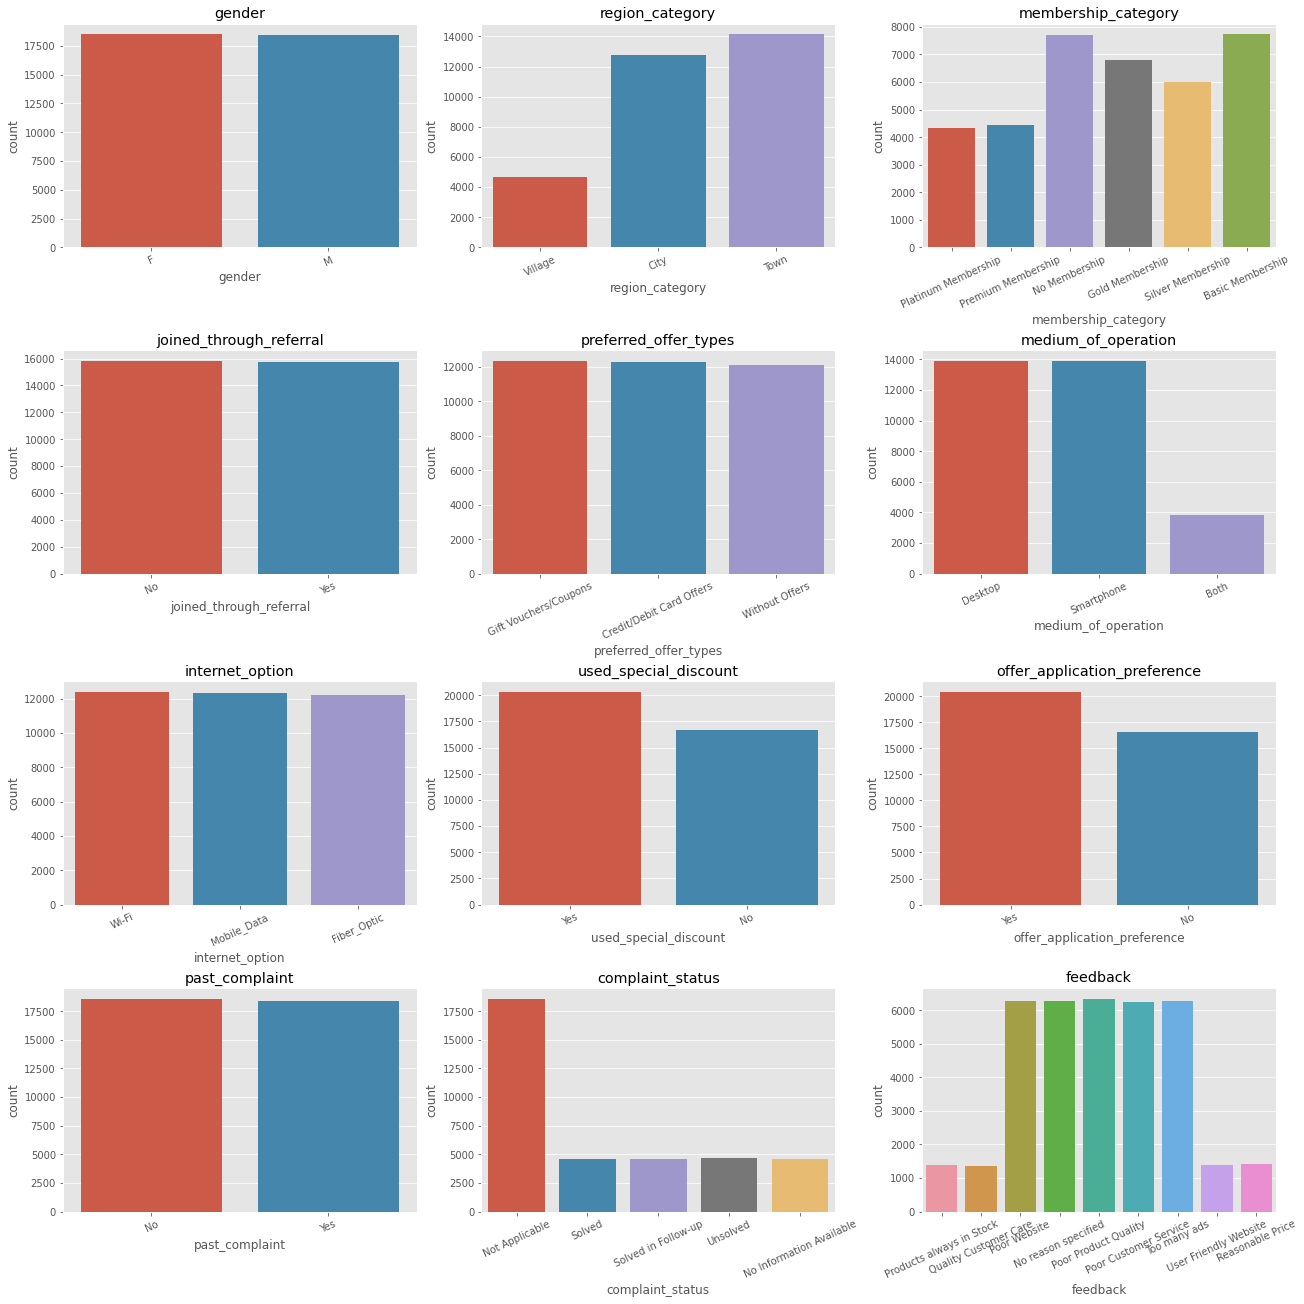

In [13]:
fig, axes = plt.subplots(4, 3, figsize=(18, 18), constrained_layout=True)
for col, ax in zip(cat, axes.flat):
    sns.countplot(data = churn, x = col, ax = ax)
    ax.tick_params(axis='x', rotation=25)
    ax.set_title(col)
# disable leftover axes
for ax in axes.flat[12:]: 
    ax.set_axis_off()

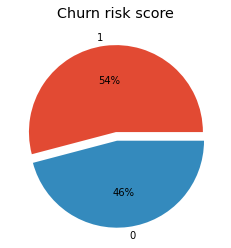

In [14]:
plt.pie(churn['churn_risk_score'].value_counts(),labels = [1,0], autopct='%.0f%%', explode=[0,0.1])
plt.title('Churn risk score')
plt.show()

* **From the graph we notice** : 
* **For gender, we can see that both genders are equally distributed** 
* **most of the customers are from towns and cities**
* **most of customers have a basic membership or no membership, while premium and platinum are least subscribed**
* **half of customers are joined through a referral**
* **preferred Offer types categories are equally distributed** 
* **most customers use a desktop or a smartphone as a medium of operation**
* **internert option categories are equally distributed**
* **most customer complains were about the poor product quality, ads, poor website and poor customer service**
* **54% of customers will leave the business, while 46% will stay**

#### numerical features

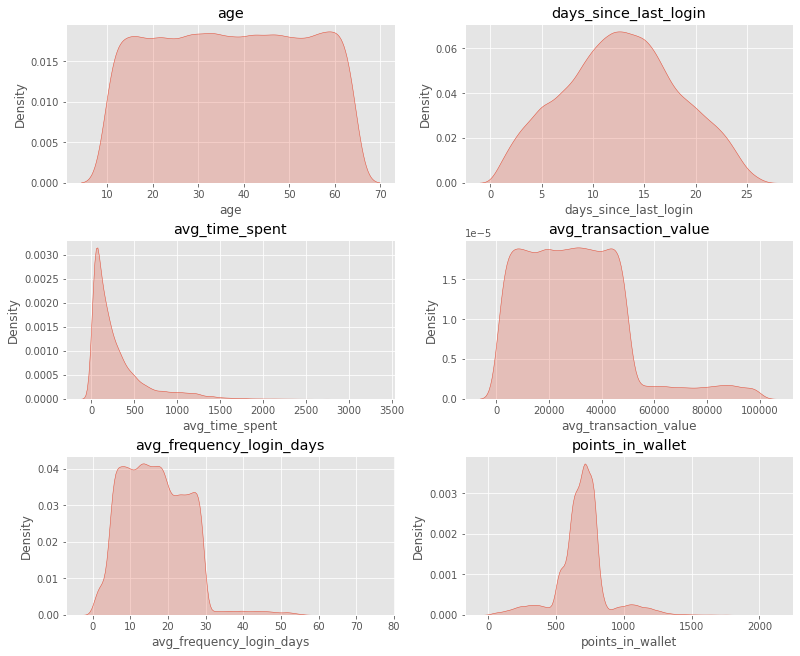

In [15]:
fig, axes = plt.subplots(3, 2, figsize=(11, 9), constrained_layout=True)

for col, ax in zip(num, axes.flat):
    sns.kdeplot(data = churn, x= col, ax = ax, shade = True)
    ax.set_title(col)
    


**From the graph:** 
* **Age is equally distributed over the customers**
* **average time spent, average transaction valu and average frequency login days are right skewed**

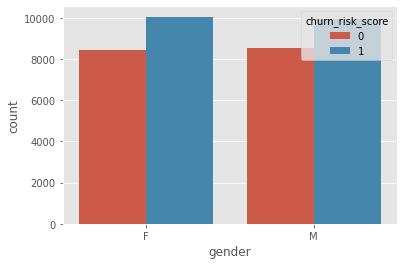

In [16]:
sns.countplot(data = churn, x = 'gender', hue = 'churn_risk_score')
plt.show()

In [17]:
churn.groupby('gender').mean()

,age,joining_date,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score
gender,,,,,,,,
F,37.107896,2016.00384,12.778995,295.679239,29197.237932,16.554283,692.273483,0.543483
M,37.125630,2016.00938,12.737945,289.989780,29346.988423,16.521608,688.417058,0.538633


* **Gender doesn't seem like it affect churn risk score, both genders have close average churn risk score**

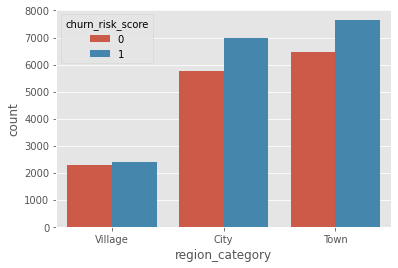

In [18]:
sns.countplot(data = churn, x = 'region_category', hue = 'churn_risk_score')
plt.show()

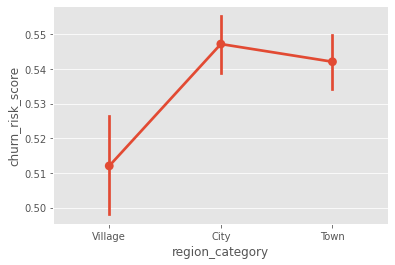

In [19]:
sns.pointplot(data = churn, x = 'region_category', y = 'churn_risk_score')
plt.show()

In [20]:
churn.groupby('region_category').mean()

,age,joining_date,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score
region_category,,,,,,,,
City,36.996703,2016.004318,12.719038,293.403898,29113.498927,16.621830,690.169909,0.547146
Town,37.149349,2016.006583,12.812547,292.977315,29105.414562,16.611429,690.418581,0.542044
Village,37.286870,2016.024048,12.638820,297.590982,30473.511647,16.208005,697.564027,0.512024


* **On average customers who live on cities are more likely to leave compared to villages**

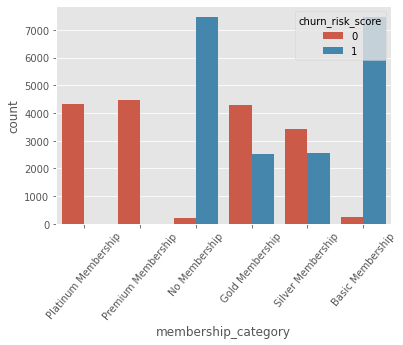

In [21]:
ax = sns.countplot(data = churn, x = 'membership_category', hue = 'churn_risk_score')
ax.tick_params(axis='x', rotation=50)
plt.show()

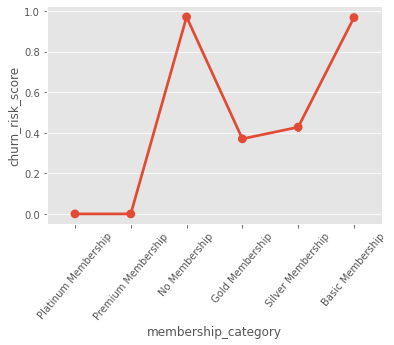

In [22]:
ax = sns.pointplot(data = churn, x = 'membership_category', y = 'churn_risk_score')
ax.tick_params(axis='x', rotation=50)
plt.show()

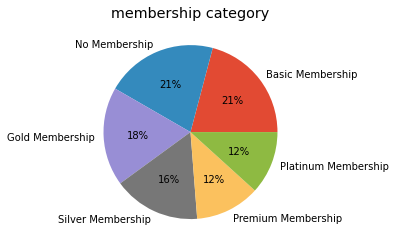

In [23]:
plt.pie(churn['membership_category'].value_counts(),labels = churn['membership_category'].value_counts().index.tolist(), autopct='%.0f%%')
plt.title('membership category')
plt.show()

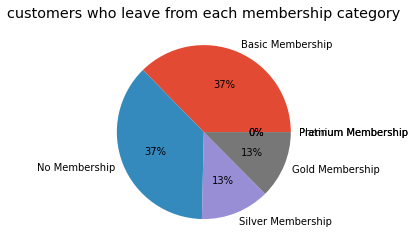

In [24]:
cros = pd.crosstab(churn.membership_category,churn.churn_risk_score).sort_values(by = 1, ascending = False)
plt.pie(cros.iloc[:,1],labels = cros.index.tolist(), autopct='%.0f%%')
plt.title('customers who leave from each membership category')
plt.show()

In [25]:
churn.groupby('membership_category').mean()

,age,joining_date,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score
membership_category,,,,,,,,
Basic Membership,37.157302,2016.000000,12.917851,289.384330,25235.326221,17.719867,626.357240,0.967504
Gold Membership,37.101398,2015.997792,12.681910,294.011045,31058.701054,16.065820,725.142452,0.369831
No Membership,37.108164,2016.025221,12.810639,289.014596,25363.630116,17.573715,625.152316,0.970619
Platinum Membership,37.091517,2016.018211,12.685005,296.985041,35347.613898,14.806500,760.610383,0.000000
Premium Membership,36.896072,2015.979798,12.639100,306.393265,35348.589235,14.748723,756.539141,0.000000
Silver Membership,37.284068,2016.012525,12.715395,287.247458,28544.675716,16.803089,716.187929,0.427522


* **The membership category seems to have a strong effect on churn score. As we see, most customers who leave the company don't have a membership or they do have a basic membership (74%). in fact most of customers from these two categories will leave (96.75% of customers from basic membership and 97.06% of customers who don't have a membership.**
* **26% of customers who left the business are from the two categories Silver and Gold membership. Also 57,24% and 63.01% of customers from these two categories will stay in the business.**
* **100% of customers of the two categories Premium and Platinium will stay.**

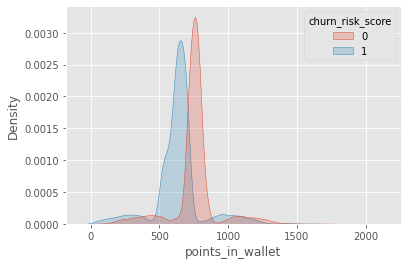

In [26]:
sns.kdeplot(data = churn ,x='points_in_wallet' , hue = 'churn_risk_score', shade = True)
plt.show()

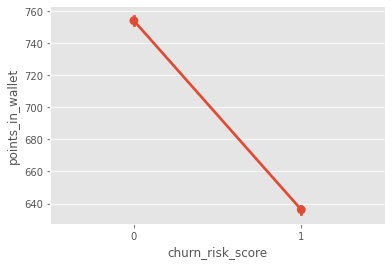

In [27]:
sns.pointplot(data = churn ,y='points_in_wallet' , x = 'churn_risk_score')
plt.show()

In [28]:
churn.groupby('churn_risk_score').mean()

,age,joining_date,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet
churn_risk_score,,,,,,,
0,37.012662,2015.999823,12.657241,297.120106,33873.282446,15.218347,754.055067
1,37.207675,2016.012293,12.844787,289.030703,25366.363813,17.659148,636.130479


* **most of customers who left have wallet points between 500 and 750. while most of customers who stayed have wallet points between 600 and 900. in general customers with more points tend to stay.**

### B- Correlation

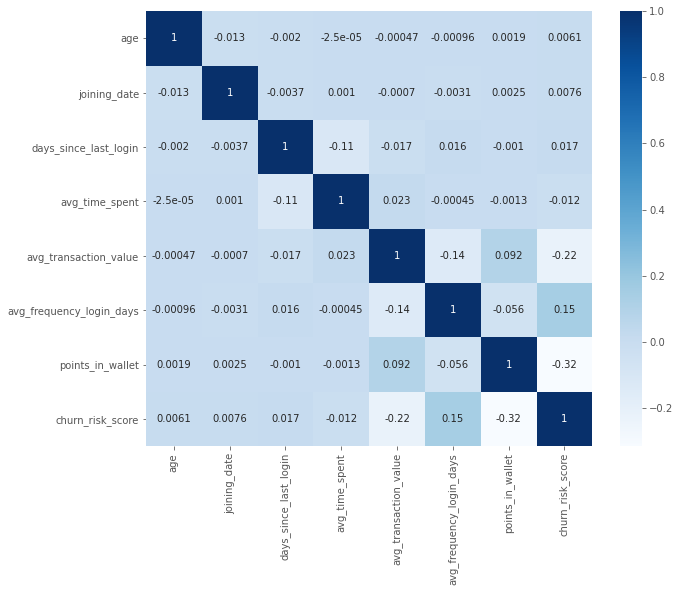

In [29]:
cor = churn.corr()
plt.figure(figsize = (10,8))
sns.heatmap(cor, cmap = 'Blues', annot = True)
plt.show()

* **In term of correlation, we didn't find a high correlation between the features the highest correlation is between churn risk score and points in wallet which equals -0.32**

## 7- Data Preprocessing

### A- Missing Data

#### Checking for missing values

In [30]:
churn.isnull().sum().sort_values(ascending = False)

joined_through_referral         5438
region_category                 5428
medium_of_operation             5393
avg_frequency_login_days        4205
points_in_wallet                3579
days_since_last_login           1999
avg_time_spent                  1719
preferred_offer_types            288
gender                            59
used_special_discount              0
feedback                           0
complaint_status                   0
past_complaint                     0
offer_application_preference       0
age                                0
avg_transaction_value              0
internet_option                    0
joining_date                       0
membership_category                0
churn_risk_score                   0
dtype: int64

* **For numerical variables we choose to replace the missing values with the median**

In [31]:
churn['avg_frequency_login_days']= churn['avg_frequency_login_days'].fillna(churn['avg_frequency_login_days'].median())
churn['points_in_wallet']= churn['points_in_wallet'].fillna(churn['points_in_wallet'].median())
churn['days_since_last_login']= churn['days_since_last_login'].fillna(churn['days_since_last_login'].median())
churn['avg_time_spent']= churn['avg_time_spent'].fillna(churn['avg_time_spent'].median())

* **For categorical variables we will replace missing values with the mode**

In [32]:
churn['region_category']= churn['region_category'].fillna(churn['region_category'].mode()[0])
churn['joined_through_referral']= churn['joined_through_referral'].fillna(churn['joined_through_referral'].mode()[0])
churn['medium_of_operation']= churn['medium_of_operation'].fillna(churn['medium_of_operation'].mode()[0])
churn['region_category']= churn['region_category'].fillna(churn['region_category'].mode()[0])
churn['preferred_offer_types']= churn['preferred_offer_types'].fillna(churn['preferred_offer_types'].mode()[0])
churn['gender']= churn['gender'].fillna(churn['gender'].mode()[0])

In [33]:
churn.isnull().sum().sort_values(ascending = False)

age                             0
gender                          0
feedback                        0
complaint_status                0
past_complaint                  0
offer_application_preference    0
used_special_discount           0
points_in_wallet                0
avg_frequency_login_days        0
avg_transaction_value           0
avg_time_spent                  0
days_since_last_login           0
internet_option                 0
medium_of_operation             0
preferred_offer_types           0
joined_through_referral         0
joining_date                    0
membership_category             0
region_category                 0
churn_risk_score                0
dtype: int64

### B- categorical variables encoding

* **membership category seems ordinal as there's an order in the categories so we'll use ordinalencoder. while we'll use pandas get_dummies for other categorical variables**

In [34]:
cat = churn.select_dtypes(exclude=["number","int64",'float64']).drop('membership_category', axis = 1).columns

In [35]:
from sklearn.preprocessing import OrdinalEncoder
ordec = OrdinalEncoder(categories = [["No Membership", "Basic Membership", "Silver Membership", "Gold Membership","Platinum Membership","Premium Membership"]])
ordec.fit(churn[['membership_category']])
churn[['membership_category']] = ordec.transform(churn[['membership_category']])
ordec.categories_

[array(['No Membership', 'Basic Membership', 'Silver Membership',
        'Gold Membership', 'Platinum Membership', 'Premium Membership'],
       dtype=object)]

In [36]:
p = pd.get_dummies(churn[cat])
churn = pd.concat([churn,p],axis = 1).drop(cat, axis = 1)

In [37]:
churn.head()

,age,membership_category,joining_date,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score,gender_F,...,complaint_status_Unsolved,feedback_No reason specified,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,18,4.0,2017,17.0,300.63,53005.25,17.0,781.75,0,1,...,0,0,0,0,0,1,0,0,0,0
1,32,5.0,2017,16.0,306.34,12838.38,10.0,698.25,0,1,...,0,0,0,0,0,0,1,0,0,0
2,44,0.0,2016,14.0,516.16,21027.00,22.0,500.69,1,1,...,0,0,0,0,1,0,0,0,0,0
3,37,0.0,2016,11.0,53.27,25239.56,6.0,567.66,1,0,...,1,0,0,0,1,0,0,0,0,0
4,31,0.0,2017,20.0,113.13,24483.66,16.0,663.06,1,1,...,0,0,0,0,1,0,0,0,0,0


### C- Identifying Target and independent variables

In [38]:
X = churn.drop('churn_risk_score', axis = 1)
Y = churn['churn_risk_score']

In [39]:
X.shape

(36992, 44)

### D- Data splitting 

In [40]:
X_train , X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

### E- Feature scalling

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## 8- Machine learning

#### Buiding functions for different metrics

* **Accuracy**

In [42]:
def accuracy(Model):
    Y_preddn = (Model.predict(X_test)>0.5).astype(int).tolist()
    Y_preddntr = (Model.predict(X_train)>0.5).astype(int).tolist()
    Y_hat = Model.predict(X_test)
    Y_hattr = Model.predict(X_train)
    if (Model == model):
        print('Training Accuracy :',
          accuracy_score(Y_preddntr,Y_train),'\n' , 'Test Accuracy : ', accuracy_score(Y_preddn, Y_test))
    else:
        print('Training Accuracy :',accuracy_score(Y_hattr,Y_train),'\n' , 'Test Accuracy : ', accuracy_score(Y_hat, Y_test))


* **Classification Report**

In [43]:
def class_report(Model):
    if (Model == model):
        print(classification_report((Model.predict(X_test)>0.5).astype(int).tolist(),Y_test))
    else:
        print(classification_report(Model.predict(X_test),Y_test))


* **Roc Curve**

In [44]:
def roc_curv(Model,title):
    if (Model == model):
        plt.figure(figsize = (10,6))
        xax, yax,_ = roc_curve((Model.predict(X_test)>0.5).astype(int).tolist(),Y_test)
        plt.plot(xax,yax,'b')
        plt.plot([0,1],[0,1], 'r--')
        plt.title(title)
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.show()
    else:
        plt.figure(figsize = (10,6))
        xax2 , yax2, _= roc_curve(Model.predict(X_test),Y_test)
        plt.plot(xax2,yax2,'b')
        plt.plot([0,1],[0,1], 'r--')
        plt.title(title)
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.show()

* **Confusion Matrix**

In [45]:
def cmatrix(Model,title):
    if (Model==model):
        matrix1 = confusion_matrix((Model.predict(X_test)>0.5).astype(int).tolist(),Y_test)
        sns.heatmap(matrix1, cmap = 'Blues',annot = True, fmt = 'd')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(title)
        plt.show
    else:
        matrix2 = confusion_matrix(Model.predict(X_test),Y_test)
        sns.heatmap(matrix2,cmap = 'Blues',annot = True , fmt = 'd')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(title)
        plt.show

### I- Deep Neural Networks

The classifier we choose to work with is a DNN using 2 hidden layers and a relu activation function

In [46]:
model = Sequential()
model.add(Dense(64, input_shape = (44,), activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = 'accuracy')
history = model.fit(X_train ,  Y_train, epochs = 35, batch_size  = 200, validation_data = (X_test,Y_test))

Epoch 1/35
148/148 [==============================] - 1s 4ms/step - loss: 0.4618 - accuracy: 0.7692 - val_loss: 0.2957 - val_accuracy: 0.8586
Epoch 2/35
148/148 [==============================] - 0s 3ms/step - loss: 0.3263 - accuracy: 0.8500 - val_loss: 0.2845 - val_accuracy: 0.8575
Epoch 3/35
148/148 [==============================] - 0s 3ms/step - loss: 0.3101 - accuracy: 0.8530 - val_loss: 0.2831 - val_accuracy: 0.8546
Epoch 4/35
148/148 [==============================] - 0s 3ms/step - loss: 0.3005 - accuracy: 0.8547 - val_loss: 0.2798 - val_accuracy: 0.8542
Epoch 5/35
148/148 [==============================] - 0s 3ms/step - loss: 0.2946 - accuracy: 0.8548 - val_loss: 0.2770 - val_accuracy: 0.8540
Epoch 6/35
148/148 [==============================] - 0s 3ms/step - loss: 0.2909 - accuracy: 0.8551 - val_loss: 0.2735 - val_accuracy: 0.8536
Epoch 7/35
148/148 [==============================] - 0s 3ms/step - loss: 0.2848 - accuracy: 0.8560 - val_loss: 0.2714 - val_accuracy: 0.8534
Epoch 

#### Accuracy

In [47]:
accuracy(model)

925/925 [==============================] - 1s 877us/step
Training Accuracy : 0.9332274524380766 
 Test Accuracy :  0.9251250168941749


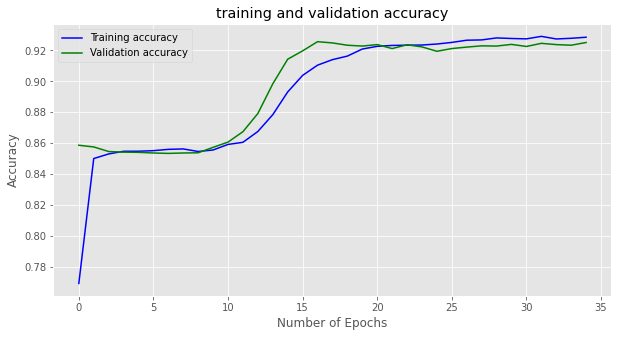

In [48]:
plt.figure(figsize = (10,5))
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']
plt.plot(train_acc, 'b', label = 'Training accuracy')
plt.plot(test_acc , 'g', label = 'Validation accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('training and validation accuracy')
plt.legend()
plt.show()

we can't see a sign for overfitting, as both accuracies of training and validation are close

####   Loss

In [49]:
L1 = model.evaluate(X_train, Y_train)
L2 = model.evaluate(X_test, Y_test)
print('training loss',L1[0],'\n','validation loss',L2[0])

232/232 [==============================] - 0s 1ms/step - loss: 0.1776 - accuracy: 0.9251
training loss 0.1622917354106903 
 validation loss 0.1775810271501541


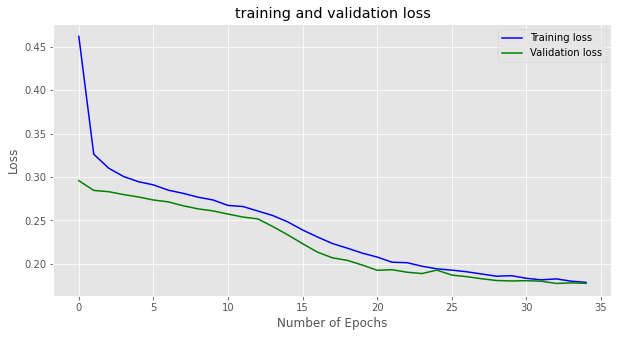

In [50]:
plt.figure(figsize = (10,5))
train_loss  = history.history['loss']
test_loss  = history.history['val_loss']
plt.plot(train_loss, 'b', label = 'Training loss')
plt.plot(test_loss, 'g', label = 'Validation loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('training and validation loss')
plt.legend()
plt.show()

Training loss and validation loss are close so we can say that there's no overfitting. we can also see that from the graph

#### Classification Report

In [51]:
class_report(model)

232/232 [==============================] - 0s 868us/step
              precision    recall  f1-score   support

           0       0.87      0.97      0.91      3031
           1       0.97      0.90      0.93      4368

    accuracy                           0.93      7399
   macro avg       0.92      0.93      0.92      7399
weighted avg       0.93      0.93      0.93      7399



#### Confusion matrix

232/232 [==============================] - 0s 873us/step


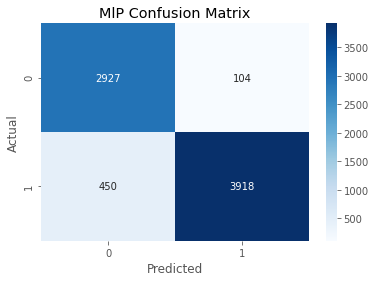

In [52]:
cmatrix(model, 'MlP Confusion Matrix')

#### Roc Curve

232/232 [==============================] - 0s 907us/step


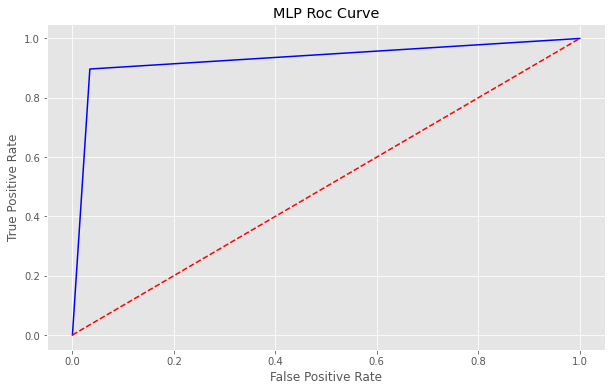

In [53]:
roc_curv(model, 'MLP Roc Curve')

### II- Decision Tree

In [54]:
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)

DecisionTreeClassifier()

#### Accuracy

In [55]:
accuracy(dt)

Training Accuracy : 1.0 
 Test Accuracy :  0.9113393701851602


#### Classification Report

In [56]:
class_report(dt)

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      3419
           1       0.91      0.92      0.92      3980

    accuracy                           0.91      7399
   macro avg       0.91      0.91      0.91      7399
weighted avg       0.91      0.91      0.91      7399



#### Looking for best parameters

In [57]:
param_dt = {'max_leaf_nodes': [5,7,9,12,15,19,20,23,26,27,64,98,None],'max_depth': [5,6,9,10,14,16,19,23,25,35,None]}
dt2 =  DecisionTreeClassifier()
sh_dt = HalvingGridSearchCV(dt2, param_dt, cv=5,factor=2,max_resources=30).fit(X_train, Y_train)
sh_dt.best_estimator_

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=9)

#### Accuracy

In [58]:
accuracy(sh_dt)

Training Accuracy : 0.9290710641029973 
 Test Accuracy :  0.9305311528584944


#### Classification Report

In [59]:
class_report(sh_dt)

              precision    recall  f1-score   support

           0       0.96      0.89      0.93      3651
           1       0.90      0.97      0.93      3748

    accuracy                           0.93      7399
   macro avg       0.93      0.93      0.93      7399
weighted avg       0.93      0.93      0.93      7399



#### Confusion Martix

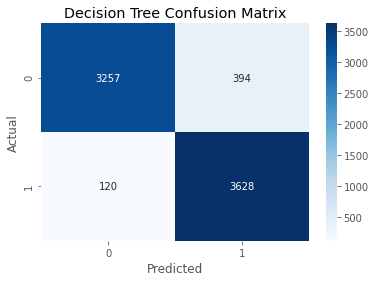

In [60]:
cmatrix(sh_dt, 'Decision Tree Confusion Matrix')

#### Roc Curve

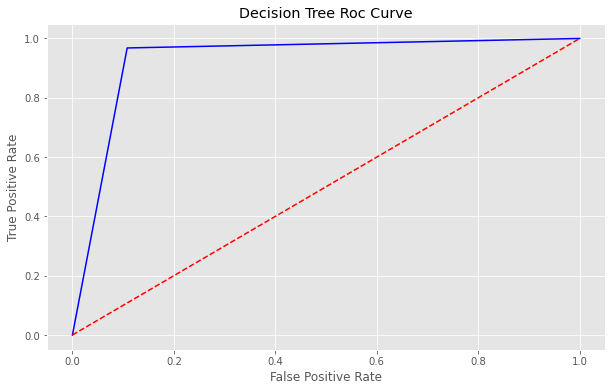

In [61]:
roc_curv(sh_dt, 'Decision Tree Roc Curve')

### III- Random Forest

In [62]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

RandomForestClassifier()

#### Accuracy

In [63]:
accuracy(rf)

Training Accuracy : 1.0 
 Test Accuracy :  0.9286390052709825


#### Classification report

In [64]:
class_report(rf)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      3377
           1       0.93      0.93      0.93      4022

    accuracy                           0.93      7399
   macro avg       0.93      0.93      0.93      7399
weighted avg       0.93      0.93      0.93      7399



#### Looking for best parameters

In [65]:

rf = RandomForestClassifier()

param_grid = {'max_depth': [2,3,14,15,17,18,19,20,27,35],'min_samples_split': [2,3,4,6,7,8,9]}
sh_rf = HalvingGridSearchCV(rf, param_grid, cv=5,factor=2, resource='n_estimators',max_resources=30).fit(X_train, Y_train)
sh_rf.best_estimator_

RandomForestClassifier(max_depth=15, min_samples_split=7, n_estimators=16)

#### Accuracy

In [66]:
accuracy(sh_rf)

Training Accuracy : 0.948940627851181 
 Test Accuracy :  0.9298553858629545


#### Classification Report

In [67]:
class_report(sh_rf)

              precision    recall  f1-score   support

           0       0.94      0.91      0.92      3490
           1       0.92      0.95      0.93      3909

    accuracy                           0.93      7399
   macro avg       0.93      0.93      0.93      7399
weighted avg       0.93      0.93      0.93      7399



#### Confusion Matrix

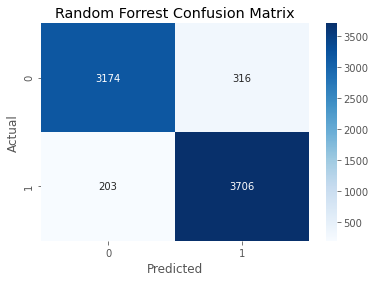

In [68]:
cmatrix(sh_rf, 'Random Forrest Confusion Matrix')

#### Roc Curve

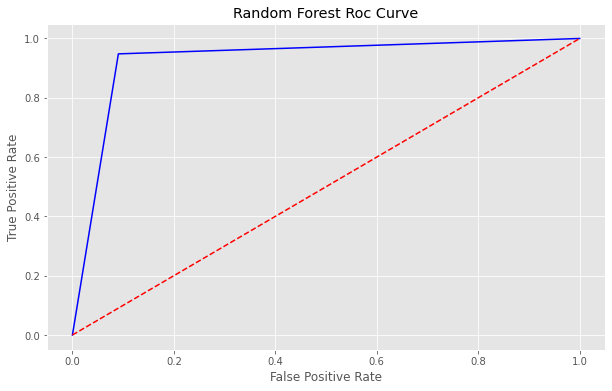

In [69]:
roc_curv(sh_rf, 'Random Forest Roc Curve')

### IV- XGboost

In [70]:
xgb = XGBClassifier()
xgb.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

#### Accuracy

In [71]:
accuracy(xgb)

Training Accuracy : 0.9730679552596898 
 Test Accuracy :  0.9313420732531423


#### Classification Report

In [72]:
class_report(xgb)

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      3245
           1       0.95      0.92      0.94      4154

    accuracy                           0.93      7399
   macro avg       0.93      0.93      0.93      7399
weighted avg       0.93      0.93      0.93      7399



#### Looking for best parameters

In [73]:
param_grid = {'gamma': [0,0.1,0.2,0.4,1.6],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25],
               'max_depth': [5,7,9,11,13,14],'reg_alpha': [0.1,0.2]}

In [74]:
xgb2 = XGBClassifier()
sh_xgb2 = HalvingGridSearchCV(xgb2, param_grid, cv=5,factor=2,max_resources=30).fit(X_train, Y_train)
sh_xgb2.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.06, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0.1, reg_lambda=1, ...)

#### Accuracy

In [75]:
accuracy(sh_xgb2)

Training Accuracy : 0.9382962187003683 
 Test Accuracy :  0.9375591296121097


#### Classification Report

In [76]:
class_report(sh_xgb2)

              precision    recall  f1-score   support

           0       0.95      0.92      0.93      3497
           1       0.93      0.96      0.94      3902

    accuracy                           0.94      7399
   macro avg       0.94      0.94      0.94      7399
weighted avg       0.94      0.94      0.94      7399



#### Confusion Matrix

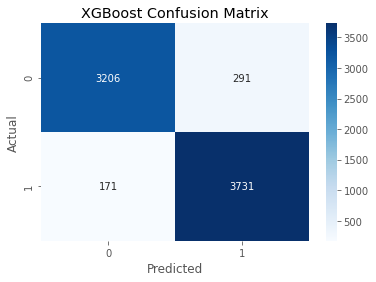

In [77]:
cmatrix(sh_xgb2, 'XGBoost Confusion Matrix')

#### Roc Curve

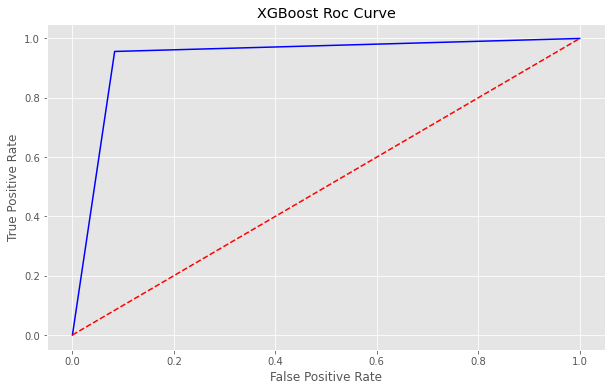

In [78]:
roc_curv(sh_xgb2, 'XGBoost Roc Curve')

 ### Models Comparison

In [79]:
Y_dnn = (model.predict(X_test)>0.5).astype(int).tolist()
Y_dt = sh_dt.predict(X_test)
Y_rf = sh_rf.predict(X_test)
Y_xgb = sh_xgb2.predict(X_test)

232/232 [==============================] - 0s 931us/step


In [80]:
comp = pd.DataFrame({'Model' : ['DNN','Decision Tree','Random Forrest', 'XGBoost'],
                     'Test Accuracy':[accuracy_score(Y_dnn,Y_test),accuracy_score(Y_dt,Y_test)
                                      , accuracy_score(Y_rf,Y_test),accuracy_score(Y_xgb,Y_test)],
             'f1-Score': [f1_score(Y_dnn,Y_test),
                          f1_score(Y_dt,Y_test),f1_score(Y_rf,Y_test), f1_score(Y_xgb,Y_test)]})

comp.style.highlight_max(color = 'lightgreen', subset = 'Test Accuracy')

,Model,Test Accuracy,f1-Score
0,DNN,0.925125,0.933969
1,Decision Tree,0.930531,0.933848
2,Random Forrest,0.929855,0.934561
3,XGBoost,0.937559,0.941696


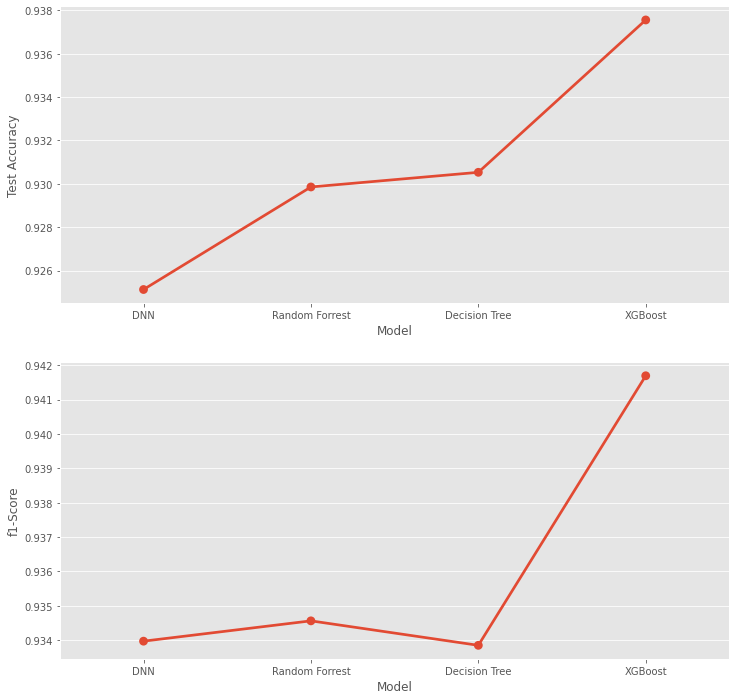

In [81]:
fig, axes = plt.subplots(2,1,figsize = (12,12) )
sns.pointplot(data = comp.sort_values('Test Accuracy'), x = 'Model', y = 'Test Accuracy', ax = axes[0])
sns.pointplot(data = comp.sort_values('Test Accuracy'), x = 'Model', y = 'f1-Score', ax = axes[1])

plt.show()

Finally, based on test accuracy and f1-score we choose XGBoost Model as our final model